PRAMA - prix de vente des biens immobiliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\morea\AppData\Local\Temp\ipykernel_29632\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
test = pd.read_csv("prama-2025\\test_data.csv")
train=  pd.read_csv("prama-2025\\train_data.csv")

In [3]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [4]:
target=['prix']
quant=['date', 'nb_chambres', 'nb_sdb','m2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages','vue_note','etat_note', 'design_note', 
       'annee_construction', 'annee_renovation','m2_interieur_15voisins', 'm2_jardin_15voisins',
       'lat','long']
qual=['vue_mer','zipcode']

In [5]:
train.columns

Index(['date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long'],
      dtype='object')

Pour avoir les années en secondes (depuis 1970)

In [6]:
train['date']=pd.to_datetime(train['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).astype('int64')//10**9
test['date']=pd.to_datetime(test['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).astype('int64')//10**9

In [7]:
train['annee_construction']=(train['annee_construction']-1970)*31557600
test['annee_construction']=(test['annee_construction']-1970)*31557600

train['annee_renovation']=(train['annee_renovation']-1970)*31557600
test['annee_renovation']=(test['annee_renovation']-1970)*31557600

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147 entries, 0 to 17146
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17147 non-null  int64  
 1   prix                    17147 non-null  int64  
 2   nb_chambres             17147 non-null  int64  
 3   nb_sdb                  17147 non-null  float64
 4   m2_interieur            17147 non-null  float64
 5   m2_jardin               17147 non-null  float64
 6   m2_etage                17147 non-null  float64
 7   m2_soussol              17147 non-null  float64
 8   nb_etages               17147 non-null  float64
 9   vue_mer                 17147 non-null  int64  
 10  vue_note                17147 non-null  int64  
 11  etat_note               17147 non-null  int64  
 12  design_note             17147 non-null  int64  
 13  annee_construction      17147 non-null  int64  
 14  annee_renovation        17147 non-null

In [9]:
train.columns

Index(['date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [10]:
train['nb_etages'].unique()

array([1. , 1.5, 2. , 3. , 2.5, 3.5])

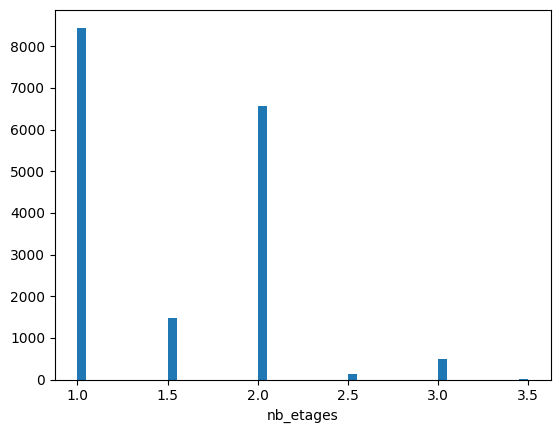

In [11]:
col='nb_etages'
plt.hist(train[col],bins=50)
plt.xlabel(col)
plt.show()

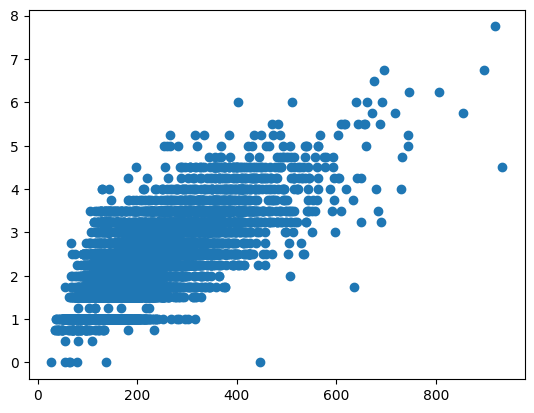

In [12]:
plt.scatter(train['m2_interieur'],train['nb_sdb'])

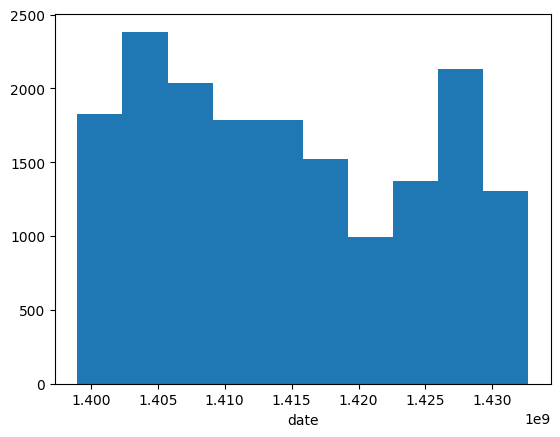

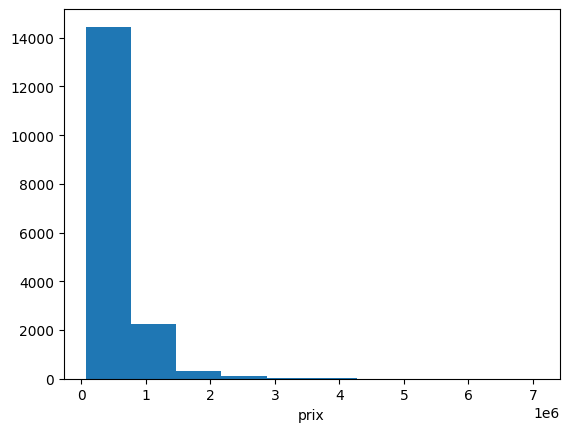

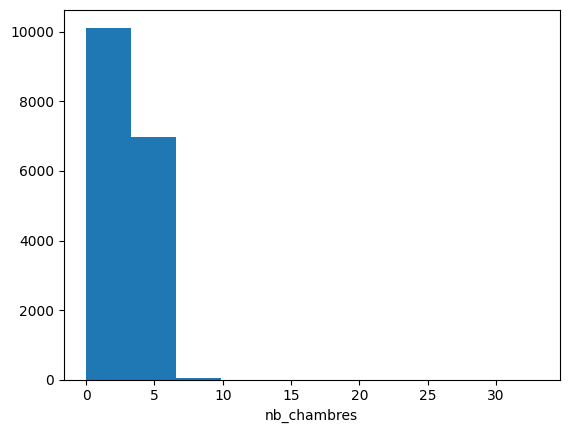

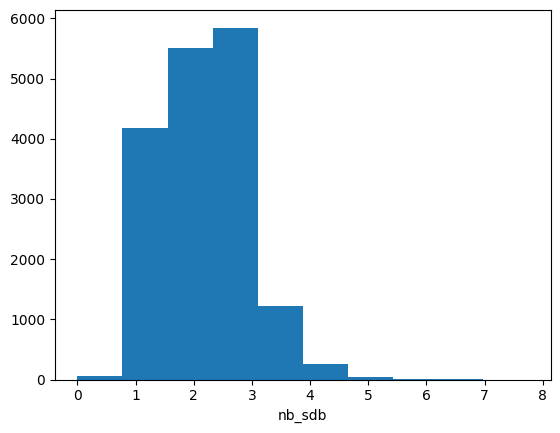

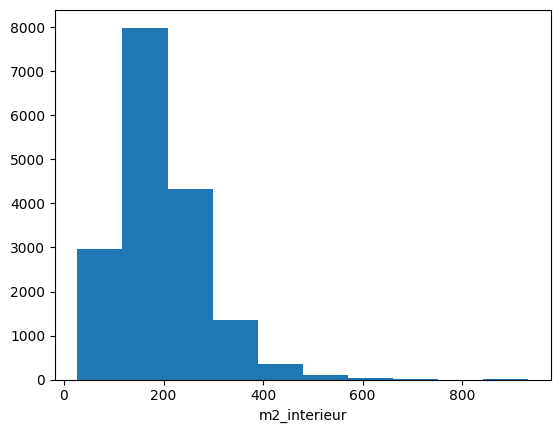

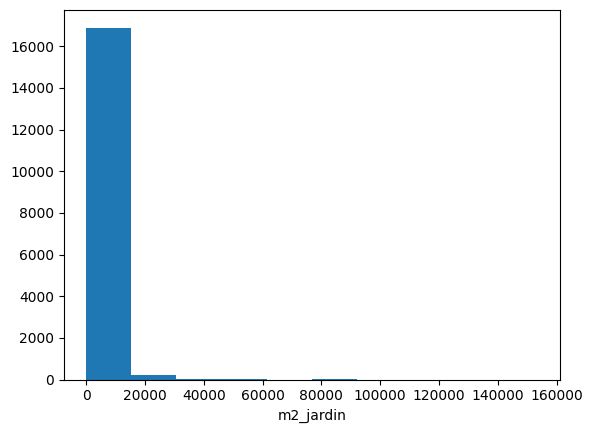

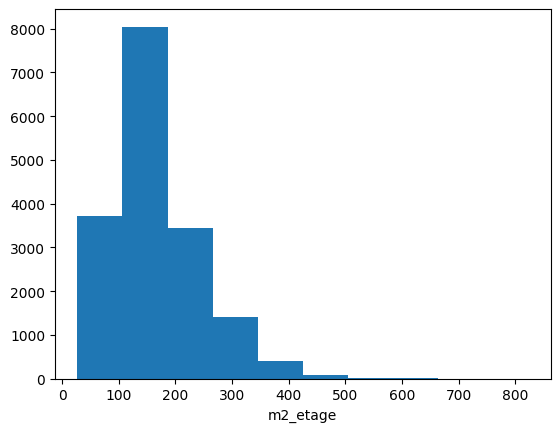

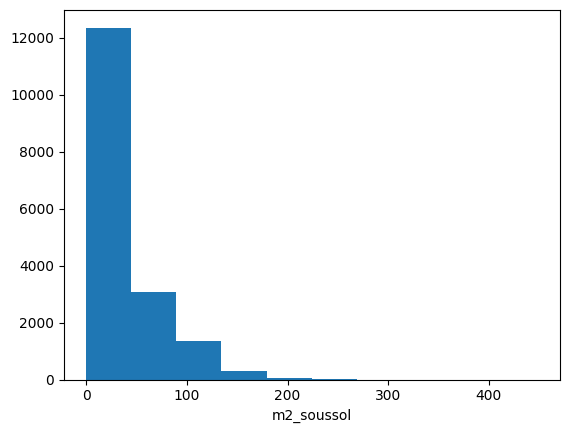

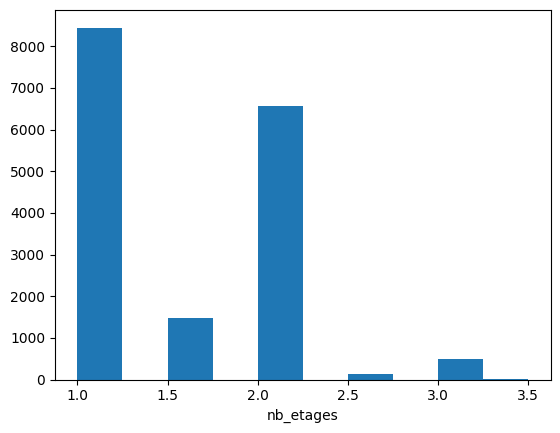

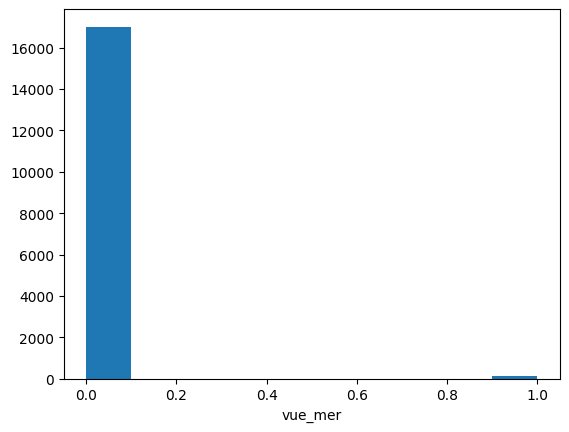

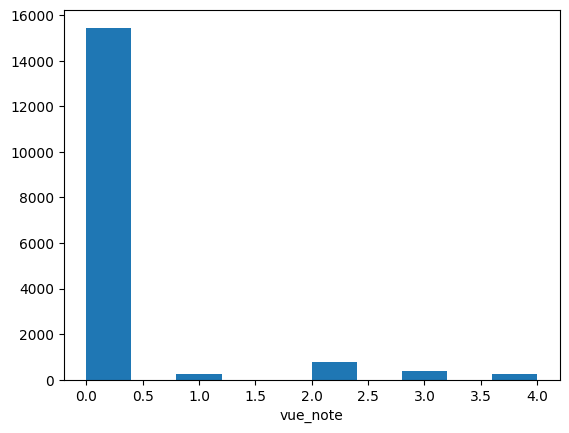

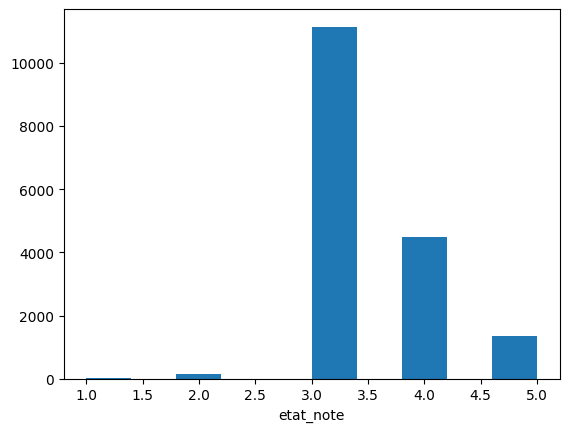

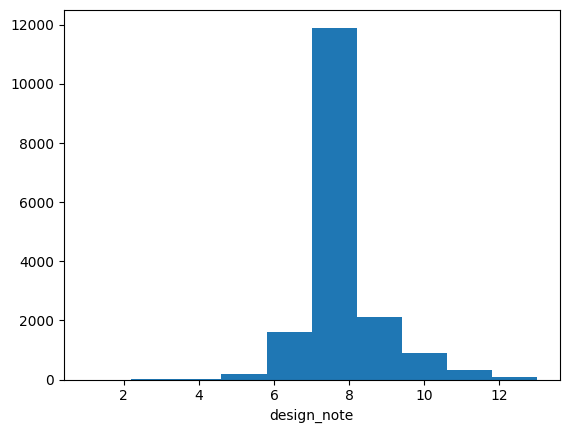

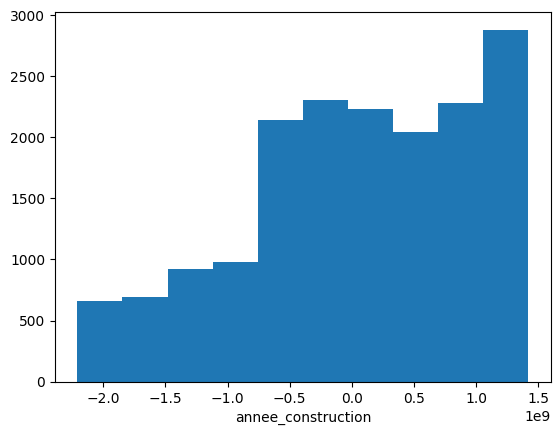

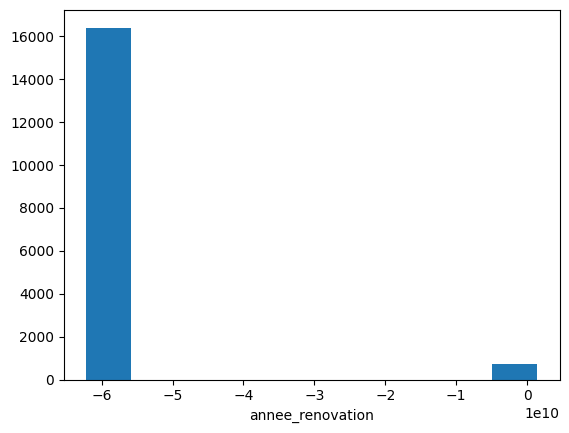

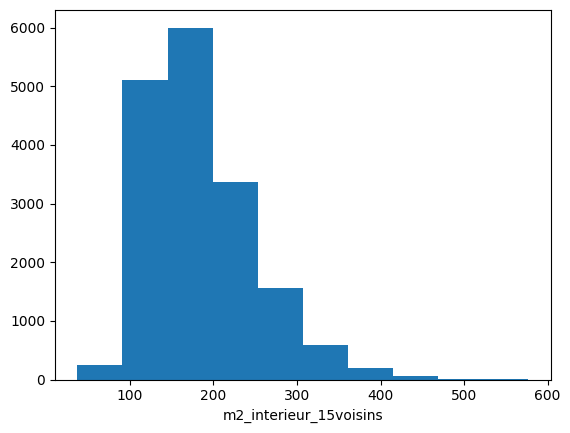

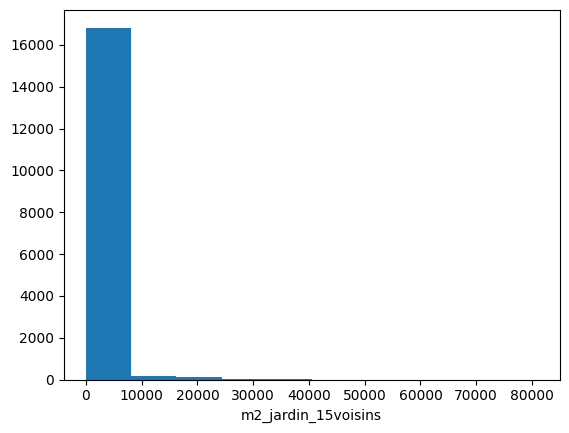

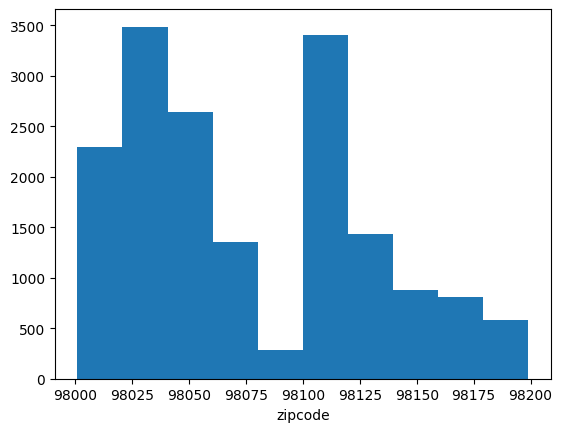

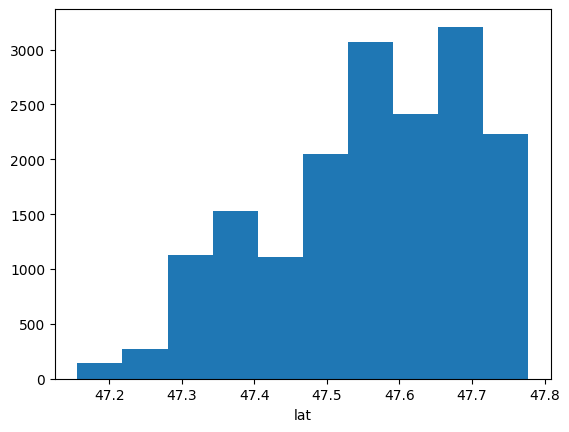

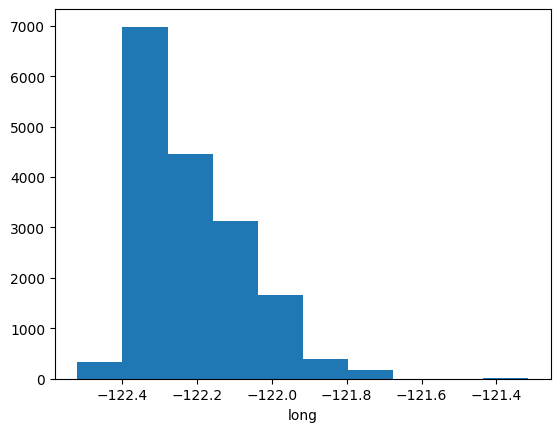

In [13]:
for col in train.columns:
    plt.hist(train[col],bins=10)
    plt.xlabel(col)
    plt.show()

In [14]:
train.describe()

,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
count,1.714700e+04,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,1.714700e+04,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,1.414541e+09,5.431939e+05,3.371669,2.123010,193.732114,1411.998121,166.652667,27.079448,1.497638,0.008048,0.235376,3.409343,7.668630,3.644022e+07,-5.945059e+10,184.852674,1187.418834,98077.654808,47.560131,-122.213735
std,9.776395e+06,3.716087e+05,0.932029,0.772906,85.587837,3879.062125,77.312579,41.221029,0.542015,0.089352,0.767578,0.649535,1.181903,9.271054e+08,1.279840e+10,64.023277,2504.936376,53.455894,0.138478,0.140614
min,1.398989e+09,7.500000e+04,0.000000,0.000000,26.941657,48.309179,26.941657,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-2.209032e+09,-6.216847e+10,37.068004,61.222594,98001.000000,47.155900,-122.519000
25%,1.405901e+09,3.230000e+05,3.000000,1.750000,132.850242,468.227425,111.482720,0.000000,1.000000,0.000000,0.000000,3.000000,7.000000,-5.838156e+08,-6.216847e+10,138.424378,473.801561,98033.000000,47.472300,-122.328000
50%,1.413418e+09,4.500000e+05,3.000000,2.250000,178.372352,706.150130,145.856559,0.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1.577880e+08,-6.216847e+10,170.940171,707.822371,98065.000000,47.572000,-122.230000
75%,1.424218e+09,6.460000e+05,4.000000,2.500000,236.900780,992.985879,206.243032,52.025269,2.000000,0.000000,0.000000,4.000000,8.000000,8.520552e+08,-6.216847e+10,219.249350,936.780007,98117.000000,47.678100,-122.124500
max,1.432685e+09,7.062500e+06,33.000000,7.750000,932.738759,153414.994426,823.114084,447.788926,3.500000,1.000000,4.000000,5.000000,13.000000,1.420092e+09,1.420092e+09,576.923077,80936.454849,98199.000000,47.777600,-121.315000


## Correlation

<Axes: >

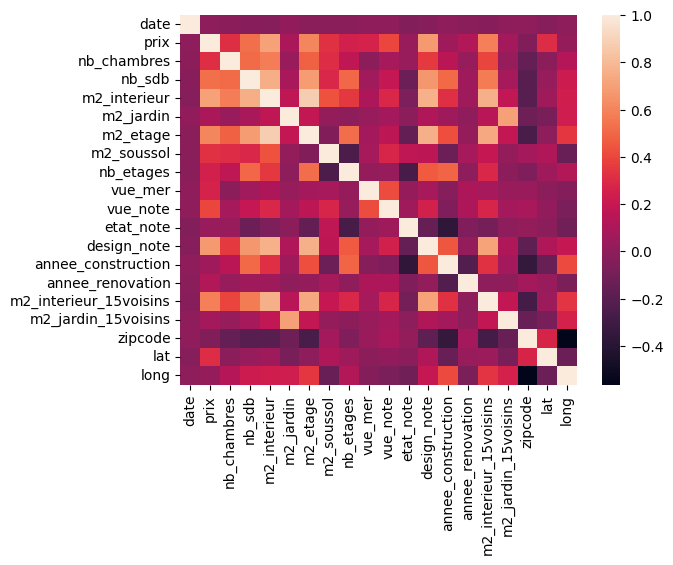

In [15]:
sns.heatmap(train.corr())

Map plot

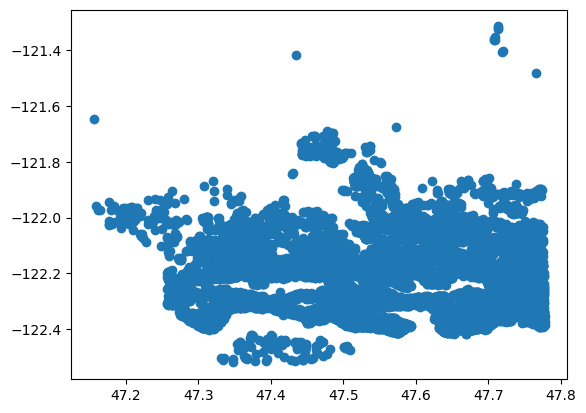

In [16]:
plt.scatter(train['lat'],train['long'])

In [ ]:
date et position pour feature engineering

In [25]:
pip install folium

  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\morea\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
import folium

# Create a map centered around Europe
m = folium.Map(location=[47.5, -122], zoom_start=6)  # Centered at Europe, zoomed in

# Add markers to the map
for lat, lon in zip(train['lat'],train['long']):
    folium.Marker([lat, lon]).add_to(m)

# Save the map as an HTML file and display it
m.save("europe_map.html")